# **1. Data Understanding**

## 1.1 Import required packages & library

In [1]:
import re
import dtale
import missingno
import numpy as np
import pandas as pd
import sweetviz as sv

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20, 10)
%matplotlib inline

# Import plotly packages
import plotly.express as px
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'dtale'

## 1.2 Data Overview

In [ ]:
# Import datset and display
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("Shape    : " , df.shape)
print ("Features : \n" , df.columns.tolist())

Rows     :  13320
Columns  :  9
Shape    :  (13320, 9)
Features : 
 ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']


In [ ]:
print ("Unique values of each features:")
pd.DataFrame(df.nunique(), columns=['Number of Unique Values'])

Unique values of each features:


,Number of Unique Values
area_type,4
availability,81
location,1305
size,31
society,2688
total_sqft,2117
bath,19
balcony,4
price,1994


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## 1.3 Data Manipulation

In [ ]:
# Drop unnecessary columns
df.drop(['availability', 'society'], axis=1, inplace=True)

# See the dropped results
df.head(10)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
8,Super built-up Area,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Plot Area,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00


**1.3.1 Handle Missing Values**

In [ ]:
# Detect any missing value from dataset
count = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum() / len(df) * 100).sort_values(ascending = False))
data_missing = pd.concat([count, percentage], axis = 1, keys = ['Count', 'Percentage'])

print('Count and Percentage of missing values for the columns: ')
data_missing

Count and Percentage of missing values for the columns: 


,Count,Percentage
balcony,609,4.572072
bath,73,0.548048
size,16,0.120120
location,1,0.007508
area_type,0,0.000000
total_sqft,0,0.000000
price,0,0.000000


Total missing values: 699


<AxesSubplot:>

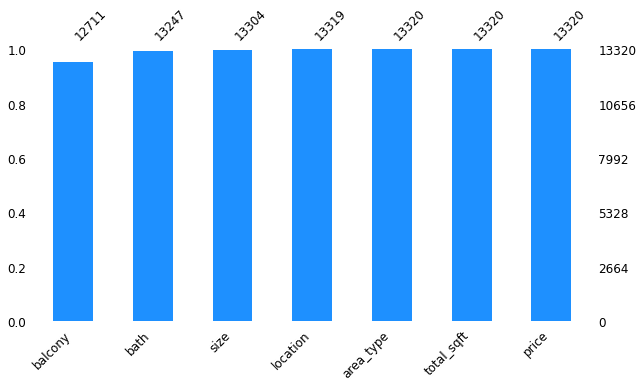

In [ ]:
# Total missing values in the dataset
sum = data_missing['Count'].sum()
print(f'Total missing values: {sum}')

missingno.bar(df=df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [ ]:
# Drop the rows with missing values
df.dropna(subset = ["location", "size", "bath", "balcony"], inplace=True)

In [ ]:
# Detect any missing value from dataset
count = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum() / len(df) * 100).sort_values(ascending = False))
data_missing = pd.concat([count, percentage], axis = 1, keys = ['Count', 'Percentage'])

print('Count and Percentage of missing values for the columns: ')
data_missing

Count and Percentage of missing values for the columns: 


,Count,Percentage
area_type,0,0.0
location,0,0.0
size,0,0.0
total_sqft,0,0.0
bath,0,0.0
balcony,0,0.0
price,0,0.0


Total missing values: 0
Shape of data after handling missing values in the dataset: (12710, 7)


<AxesSubplot:>

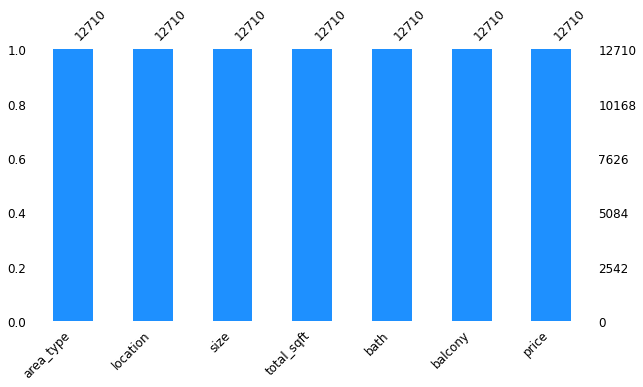

In [ ]:
# Total missing values in the dataset
sum = data_missing['Count'].sum()
print(f'Total missing values: {sum}')
print(f'Shape of data after handling missing values in the dataset: {df.shape}')
missingno.bar(df=df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [ ]:
df.head(7)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,1.0,38.00
8,Super built-up Area,Marathahalli,3 BHK,1310,3.0,1.0,63.25


**1.3.2 Processing Columns Data**

In [ ]:
# Rename column 'size' to 'BHK' and take the number only from the column content
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.rename(columns = {'size': 'BHK'}, inplace = True)

# Remove the 'area' word in each row of the 'area_type' column
df['area_type'] = df['area_type'].apply(lambda x: ' '.join(x.split()[:-1]).strip())

# Display
df.head(7)

,area_type,location,BHK,total_sqft,bath,balcony,price
0,Super built-up,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up,Kothanur,2,1200,2.0,1.0,51.00
5,Super built-up,Whitefield,2,1170,2.0,1.0,38.00
8,Super built-up,Marathahalli,3,1310,3.0,1.0,63.25


In [ ]:
# Convert float to int for 'bath' & 'balcony' columns
df['bath'] = df['bath'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')
df.head(7)

,area_type,location,BHK,total_sqft,bath,balcony,price
0,Super built-up,Electronic City Phase II,2,1056,2,1,39.07
1,Plot,Chikka Tirupathi,4,2600,5,3,120.00
2,Built-up,Uttarahalli,3,1440,2,3,62.00
3,Super built-up,Lingadheeranahalli,3,1521,3,1,95.00
4,Super built-up,Kothanur,2,1200,2,1,51.00
5,Super built-up,Whitefield,2,1170,2,1,38.00
8,Super built-up,Marathahalli,3,1310,3,1,63.25


Below shows that **total_sqft** can be a range (e.g. 2100-2850). For such case we can just take the **average of min and max value** in the range.

In [ ]:
# Check there are how many 'total_sqft' column data containing '-' character
df.loc[df['total_sqft'].str.contains('-'), 'total_sqft'].head(10)

30     2100 - 2850
122    3067 - 8156
137    1042 - 1105
165    1145 - 1340
188    1015 - 1540
549    1195 - 1440
661    1120 - 1145
672    3090 - 5002
772    1160 - 1195
850    1115 - 1130
Name: total_sqft, dtype: object

In [ ]:
# Find the median value of 'total_sqft' column data if it contains '-' character
df['total_sqft'] = df['total_sqft'].apply(lambda x: int(float(re.findall( r'\d+\.*\d*', str(x))[0])) if x.find('-') == -1 else int((float(x.split('-')[0]) + float(x.split('-')[1]))/2))
df.head(7)

,area_type,location,BHK,total_sqft,bath,balcony,price
0,Super built-up,Electronic City Phase II,2,1056,2,1,39.07
1,Plot,Chikka Tirupathi,4,2600,5,3,120.00
2,Built-up,Uttarahalli,3,1440,2,3,62.00
3,Super built-up,Lingadheeranahalli,3,1521,3,1,95.00
4,Super built-up,Kothanur,2,1200,2,1,51.00
5,Super built-up,Whitefield,2,1170,2,1,38.00
8,Super built-up,Marathahalli,3,1310,3,1,63.25


In [ ]:
# Check the row 30th values of 'total_sqft' column to see if the data contains '-' character has been converted to median value
df.loc[30, :]

area_type     Super built-up
location           Yelahanka
BHK                        4
total_sqft              2475
bath                       4
balcony                    0
price                  186.0
Name: 30, dtype: object

In [ ]:
# Create price_per_sqft column
df['price_per_sqft'] = round(df['price']*100000 / df['total_sqft'], 2)

# Remove extra front and back whitespaces from 'location' column
df['location'] = df['location'].apply(lambda x: x.strip())

df.head(10)

,area_type,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up,Electronic City Phase II,2,1056,2,1,39.07,3699.81
1,Plot,Chikka Tirupathi,4,2600,5,3,120.00,4615.38
2,Built-up,Uttarahalli,3,1440,2,3,62.00,4305.56
3,Super built-up,Lingadheeranahalli,3,1521,3,1,95.00,6245.89
4,Super built-up,Kothanur,2,1200,2,1,51.00,4250.00
5,Super built-up,Whitefield,2,1170,2,1,38.00,3247.86
8,Super built-up,Marathahalli,3,1310,3,1,63.25,4828.24
10,Super built-up,Whitefield,3,1800,2,2,70.00,3888.89
11,Plot,Whitefield,4,2785,5,3,295.00,10592.46
12,Super built-up,7th Phase JP Nagar,2,1000,2,1,38.00,3800.00


Examine **locations** column, which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [ ]:
location_stats = df.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [ ]:
print(f"Number of location less than and equal to 10: {len(location_stats.loc[location_stats <= 10])}")
print(f"Number of location more than 10             :  {len(location_stats.loc[location_stats > 10])}")
print(f"Total number of location                    : {len(location_stats)}")

Number of location less than and equal to 10: 1017
Number of location more than 10             :  237
Total number of location                    : 1254


In [ ]:
# Display location less than 10 data points
location_stats.loc[location_stats <= 10]

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [ ]:
# Change the location name to other if the location appears less than 10 times in the dataset
df.location = df.location.apply(lambda x: 'Other' if x in location_stats.loc[location_stats <= 10].index.tolist() else x)
df.location.loc[df.location == 'Other']

18       Other
19       Other
25       Other
42       Other
49       Other
         ...  
13278    Other
13285    Other
13291    Other
13292    Other
13302    Other
Name: location, Length: 2739, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12710 non-null  object 
 1   location        12710 non-null  object 
 2   BHK             12710 non-null  int64  
 3   total_sqft      12710 non-null  int64  
 4   bath            12710 non-null  int64  
 5   balcony         12710 non-null  int64  
 6   price           12710 non-null  float64
 7   price_per_sqft  12710 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
print(f'Latest shape of data: {df.shape}')
df.head()

Latest shape of data: (12710, 8)


,area_type,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up,Electronic City Phase II,2,1056,2,1,39.07,3699.81
1,Plot,Chikka Tirupathi,4,2600,5,3,120.00,4615.38
2,Built-up,Uttarahalli,3,1440,2,3,62.00,4305.56
3,Super built-up,Lingadheeranahalli,3,1521,3,1,95.00,6245.89
4,Super built-up,Kothanur,2,1200,2,1,51.00,4250.00


**1.3.3 Handling Outliers (Outlier Removal Using Business Logic)**

As a data scientist, when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft). If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

Since the **threshhold** for the **sqft per bedroom is 300**, we now need to treat any row data containing **sqft per bedroom less than 300 as outliers**.

In [ ]:
# Display the outliers
df.loc[(df.total_sqft/df.BHK) < 300]

,area_type,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
58,Plot,Murugeshpalya,6,1407,4,1,150.0,10660.98
68,Plot,Devarachikkanahalli,8,1350,7,0,85.0,6296.30
70,Plot,Other,3,500,3,2,100.0,20000.00
78,Built-up,Kaval Byrasandra,2,460,1,0,22.0,4782.61
89,Plot,Rajaji Nagar,6,710,6,3,160.0,22535.21
...,...,...,...,...,...,...,...,...
13219,Plot,Laggere,7,1590,9,3,132.0,8301.89
13221,Plot,Other,9,1178,9,1,75.0,6366.72
13281,Plot,Margondanahalli,5,1375,5,1,125.0,9090.91
13303,Plot,Vidyaranyapura,5,774,5,3,70.0,9043.93


In [ ]:
# Remove the outliers (sqft per bedroom less than 300 as outliers)
df = df.loc[~((df.total_sqft / df.BHK) < 300)]
df

,area_type,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up,Electronic City Phase II,2,1056,2,1,39.07,3699.81
1,Plot,Chikka Tirupathi,4,2600,5,3,120.00,4615.38
2,Built-up,Uttarahalli,3,1440,2,3,62.00,4305.56
3,Super built-up,Lingadheeranahalli,3,1521,3,1,95.00,6245.89
4,Super built-up,Kothanur,2,1200,2,1,51.00,4250.00
...,...,...,...,...,...,...,...,...
13314,Super built-up,Green Glen Layout,3,1715,3,3,112.00,6530.61
13315,Built-up,Whitefield,5,3453,4,0,231.00,6689.83
13317,Built-up,Raja Rajeshwari Nagar,2,1141,2,1,60.00,5258.55
13318,Super built-up,Padmanabhanagar,4,4689,4,1,488.00,10407.34


In [ ]:
print(f'Shape of data after removing above outliers: {df.shape}')

Shape of data after removing above outliers: (12019, 8)


**Outlier Removal Using Standard Deviation and Mean**

In [ ]:
def plot_graph(col_name_lst, count, num):
    if count > 0:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col_name_lst[num]], data=df)
        plt.title(f'Boxplot of {col_name_lst[num]}')
        plt.show()
        plot_graph(col_name_lst, count-1, num+1)

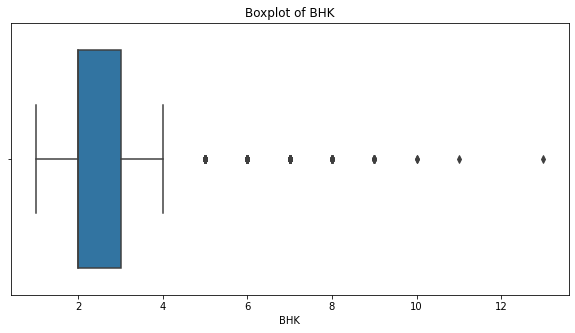

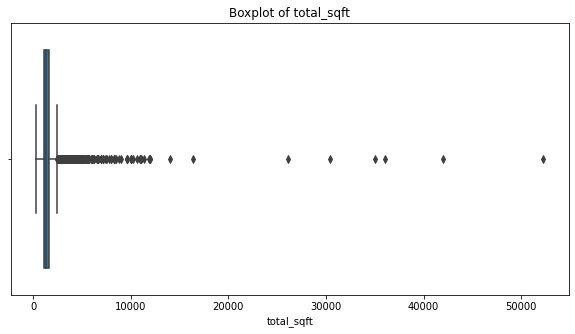

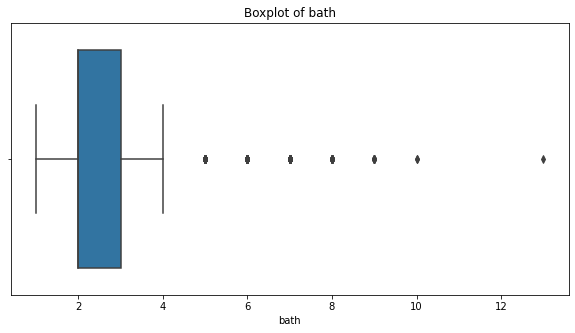

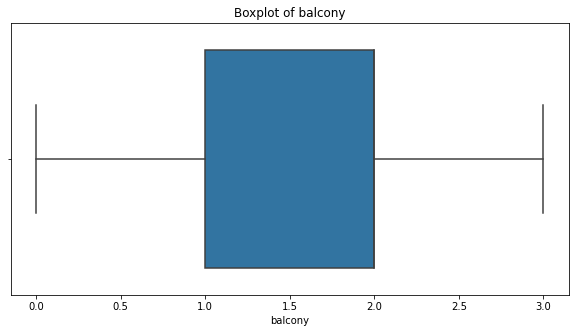

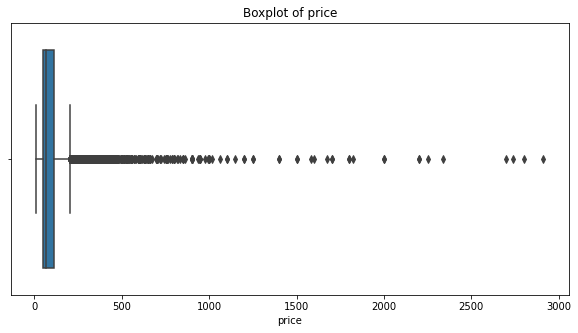

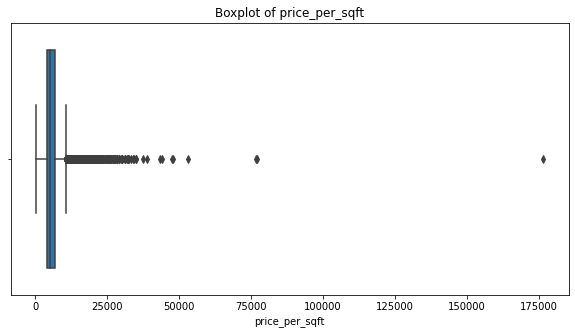

Shape before removing outliers: (12019, 8)


In [ ]:
lst = []
for col_name, col_type in zip(df.columns.tolist(), df.dtypes.tolist()):
    if (col_type == 'int64' or col_type == 'float64'):
        lst.append(col_name)

plot_graph(lst, len(lst), 0)

# Original Shape before removing outliers
print(f'Shape before removing outliers: {df.shape}') 

In [ ]:
# Let describe the data of "price_per_sqft" column
df.price_per_sqft.describe()

count     12019.000000
mean       6206.115427
std        3984.739514
min         267.830000
25%        4199.720000
50%        5252.670000
75%        6823.770000
max      176470.590000
Name: price_per_sqft, dtype: float64

From the diagram and describe function above, we can clearly see that there are **many outliers** contain in **`price_per_sqft`** column, we find that min price per sqft is 267.83 rs/sqft whereas max is 176470.59, this shows a wide variation in property prices. We should remove outliers per location using **mean and one standard deviation**. The reason why we need to base on location column is because the **mean** and **standard deviation** of each location is different.

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for location_name, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduce_df = subdf.loc[(subdf.price_per_sqft > (mean - sd)) & (subdf.price_per_sqft <= (mean + sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df

,area_type,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up,1st Block Jayanagar,4,2850,4,1,428.00,15017.54
1,Super built-up,1st Block Jayanagar,3,1630,3,2,194.00,11901.84
2,Super built-up,1st Block Jayanagar,3,1875,2,3,235.00,12533.33
3,Built-up,1st Block Jayanagar,3,1200,2,0,130.00,10833.33
4,Super built-up,1st Block Jayanagar,2,1235,2,2,148.00,11983.81
...,...,...,...,...,...,...,...,...
9849,Super built-up,Yeshwanthpur,3,2500,3,3,138.00,5520.00
9850,Super built-up,Yeshwanthpur,2,1160,2,2,64.08,5524.14
9851,Super built-up,Yeshwanthpur,3,2503,3,3,138.00,5513.38
9852,Super built-up,Yeshwanthpur,3,1855,3,3,135.00,7277.63


In [ ]:
print(f'Shape of data after removing above outliers: {df.shape}')

Shape of data after removing above outliers: (9854, 8)


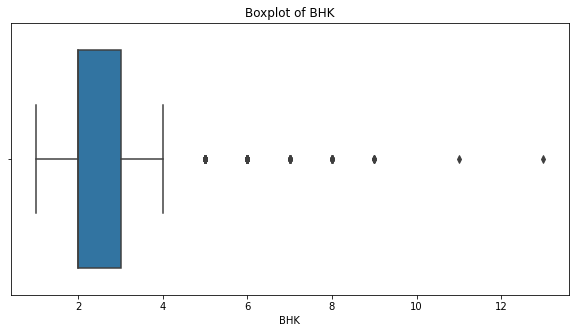

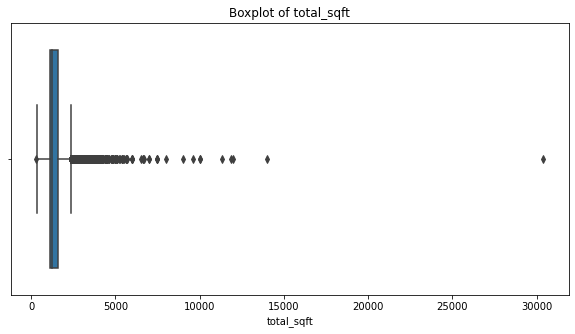

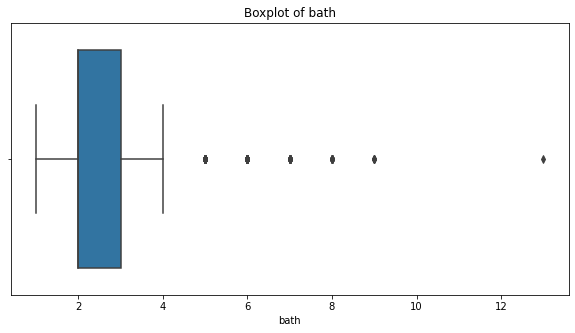

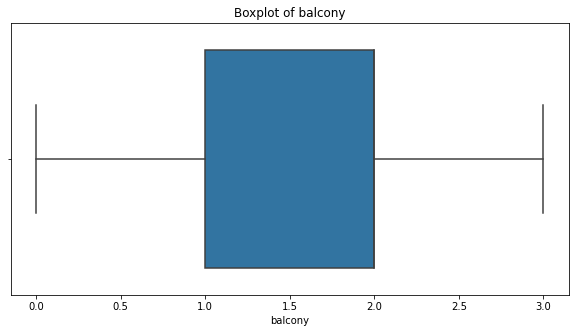

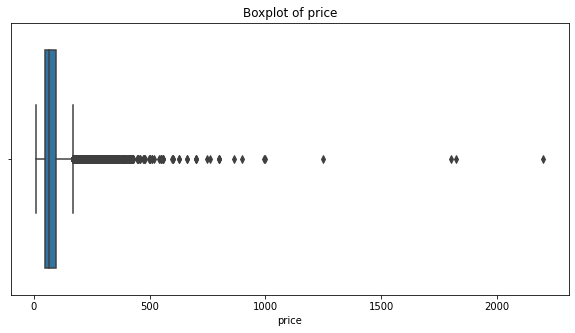

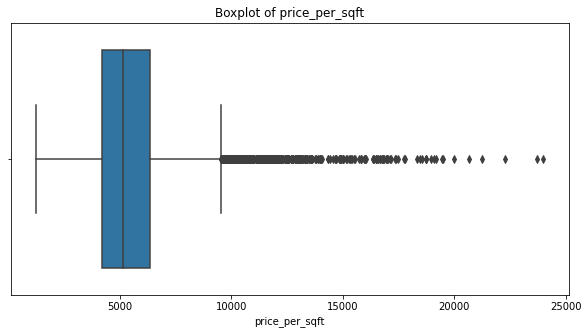

In [ ]:
"""
Plot the boxplot graph again to see the results after removing above
outliers.
"""
lst = []
for col_name, col_type in zip(df.columns.tolist(), df.dtypes.tolist()):
    if (col_type == 'int64' or col_type == 'float64'):
        lst.append(col_name)

plot_graph(lst, len(lst), 0)

In [ ]:
# # Remove outliers
# for col_name, col_type in zip(df.columns.tolist(), df.dtypes.tolist()):
#     if col_type == 'int64' or col_type == 'float64':
#         Q1 = df[col_name].quantile(0.25)
#         Q3 = df[col_name].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_whisker = Q1 - (1.5 * IQR)
#         upper_whisker = Q3 + (1.5 * IQR)
#         print(f'Q1           : {Q1}\nQ3           : {Q3}\nIQR          : {IQR}\nlower_whisker: {lower_whisker}\nupper_whisker: {upper_whisker}\n')
#         df = df.loc[(df[col_name] > lower_whisker) & (df[col_name] < upper_whisker)]

Let's check if for a given **`location`** how does the **2 BHK and 3 BHK** property prices look like

In [ ]:
def plot_scatter_chart(df, location):
    bhk2 = df.loc[(df.location==location) & (df.BHK==2)]
    bhk3 = df.loc[(df.location==location) & (df.BHK==3)]
    fig = go.Figure(data = [go.Scatter(x = bhk2.total_sqft, y = bhk2.price, mode = 'markers', name = '2 BHK'), go.Scatter(x = bhk3.total_sqft, y = bhk3.price, mode = 'markers', name = '3 BHK')])
    fig.update_layout(title=location, yaxis_title='Price (Lakh Indian Rupees)', xaxis_title='Total Square Feet Area', width=900, height=700, title_x = 0.5)
    fig.show()

plot_scatter_chart(df, "Rajaji Nagar")

In [ ]:
# def plot_scatter_chart(df, location):
#     bhk2 = df.loc[(df.location==location) & (df.BHK==2)]
#     bhk3 = df.loc[(df.location==location) & (df.BHK==3)]
#     matplotlib.rcParams['figure.figsize'] = (15,10)
#     plt.scatter(x=bhk2.total_sqft, y=bhk2.price, c='blue', label='2 BHK', s=50)
#     plt.scatter(x=bhk3.total_sqft, y=bhk3.price, marker='+', c='green', label='3 BHK', s=50)
#     plt.xlabel("Total Square Feet Area")
#     plt.ylabel("Price (Lakh Indian Rupees)")
#     plt.title(location)
#     plt.legend()
    
# plot_scatter_chart(df,"Rajaji Nagar")

In [ ]:
plot_scatter_chart(df, "Hebbal")

We should also remove properties where for same location, the price of 3 bedrooms apartment is less than 2 bedrooms apartment (with same suare ft. area). What we will do is for a given location, we will build a dictionary of stats per bhk. Example is as shown as below:

{

     '1': {
         'mean': 4000,
         'std': 2000,
         'count': 34
     },
     '2': {
         'mean': 4300,
         'std': 2300,
         'count': 22
     }, 
         
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment.

In [ ]:
def remove_bhk_outliers(df):
    
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        # print(f'Location: {location}')
        # print(f'Location DF:\n{location_df}\n')
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            # print(f'BHK: {bhk}, Length: {bhk_df.shape[0]}')
            # print(f'BHK DF:\n{bhk_df}\n')
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] >= 5:
                exclude_indices = np.append(arr = exclude_indices, values = bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis = 'index')

df = remove_bhk_outliers(df)

Plot same scatter chart again to visualize **price_per_sqft for 2 BHK** and **3 BHK** properties

In [ ]:
plot_scatter_chart(df, "Rajaji Nagar")

In [ ]:
plot_scatter_chart(df, "Hebbal")

Again the business manager has a conversation with you (i.e. a data scientist) that if you have **4 bedroom** home and **even if you have bathroom in all 4 rooms plus one guest bathroom**, you will have **total bath = total bed + 1 max**. Anything above that is an outlier or a data error and can be removed

In [ ]:
# View the outliers
df.loc[df.bath > df.BHK+1]

,area_type,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
33,Plot,2nd Stage Nagarbhavi,6,3000,8,3,451.0,15033.33
34,Plot,2nd Stage Nagarbhavi,6,2400,8,3,450.0,18750.00
506,Super built-up,Arekere,4,2710,6,2,142.0,5239.85
553,Plot,BTM 2nd Stage,3,1260,5,1,185.0,14682.54
785,Super built-up,Bannerghatta,4,3012,6,2,250.0,8300.13
...,...,...,...,...,...,...,...,...
8700,Super built-up,Thigalarapalya,4,3122,6,2,235.0,7527.23
8706,Super built-up,Thigalarapalya,4,3122,6,2,245.0,7847.53
9050,Plot,Vijayanagar,4,2100,6,1,252.0,12000.00
9262,Super built-up,Whitefield,3,2700,5,2,175.0,6481.48


In [ ]:
# Remove the outliers and update the DataFrame
df = df.loc[df.bath <= df.BHK+1]
df

,area_type,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up,1st Block Jayanagar,4,2850,4,1,428.0,15017.54
1,Super built-up,1st Block Jayanagar,3,1630,3,2,194.0,11901.84
2,Super built-up,1st Block Jayanagar,3,1875,2,3,235.0,12533.33
3,Built-up,1st Block Jayanagar,3,1200,2,0,130.0,10833.33
4,Super built-up,1st Block Jayanagar,2,1235,2,2,148.0,11983.81
...,...,...,...,...,...,...,...,...
9845,Super built-up,Yeshwanthpur,2,1195,2,2,100.0,8368.20
9846,Super built-up,Yeshwanthpur,3,1692,3,3,108.0,6382.98
9848,Built-up,Yeshwanthpur,6,2500,5,2,185.0,7400.00
9852,Super built-up,Yeshwanthpur,3,1855,3,3,135.0,7277.63


# **2. Exploratary Data Analysis**

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



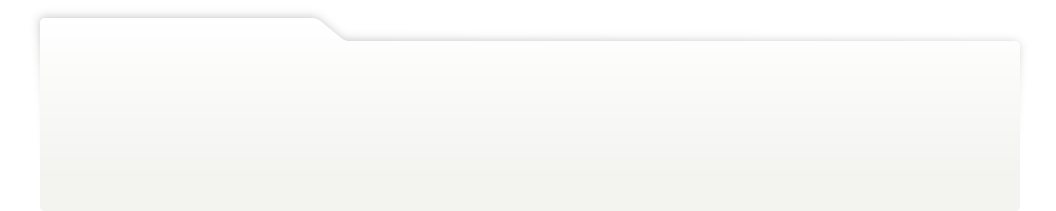
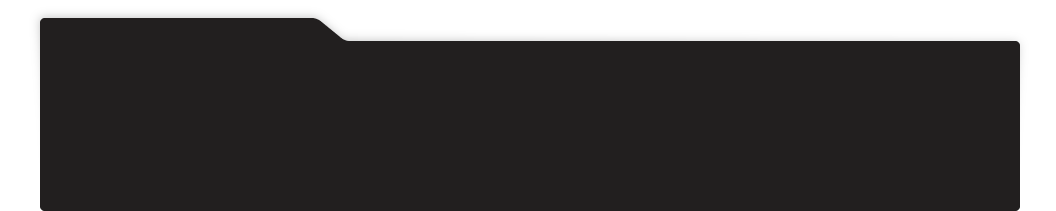
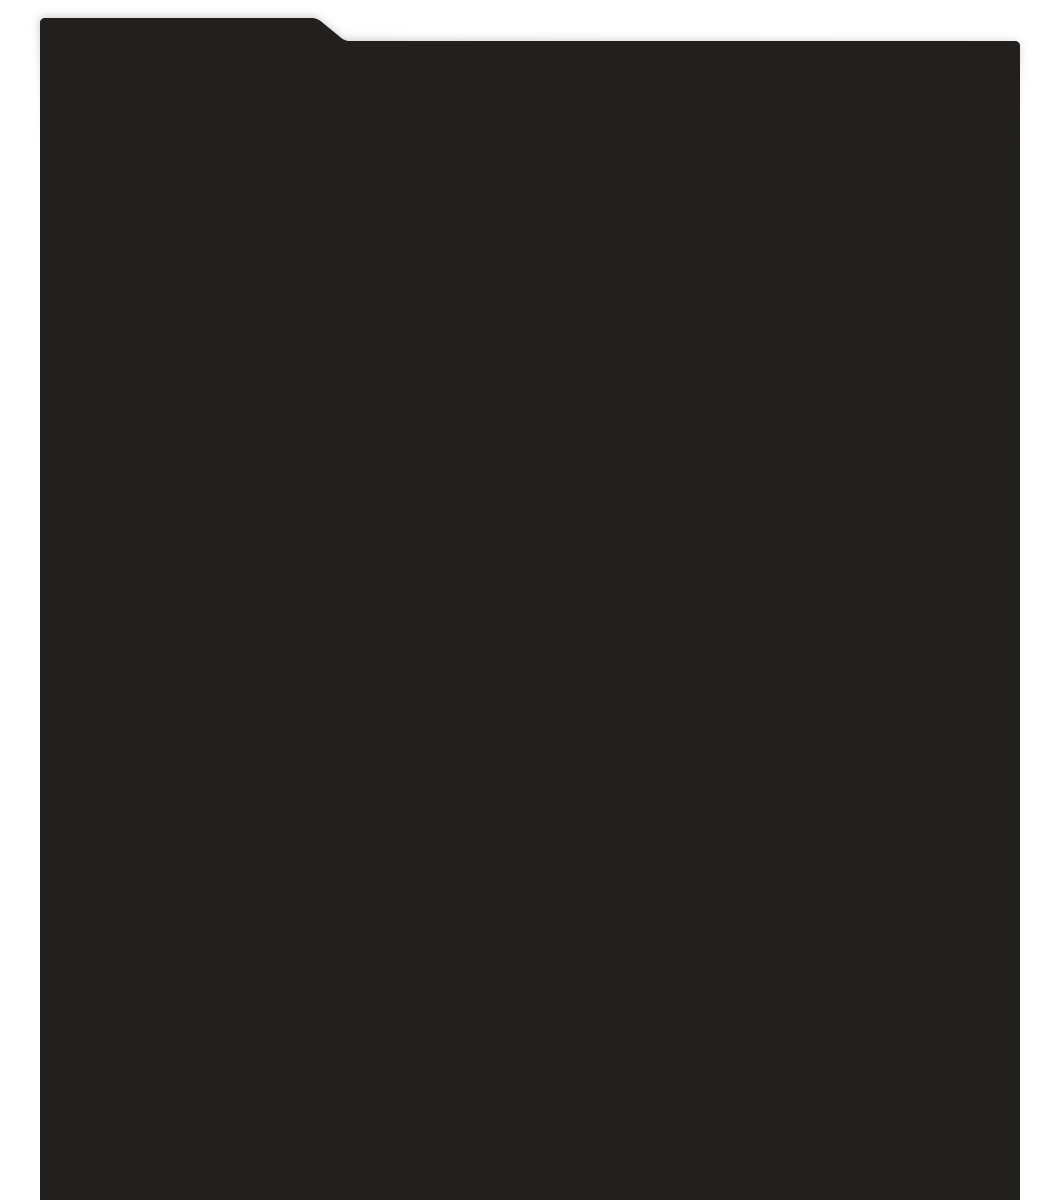
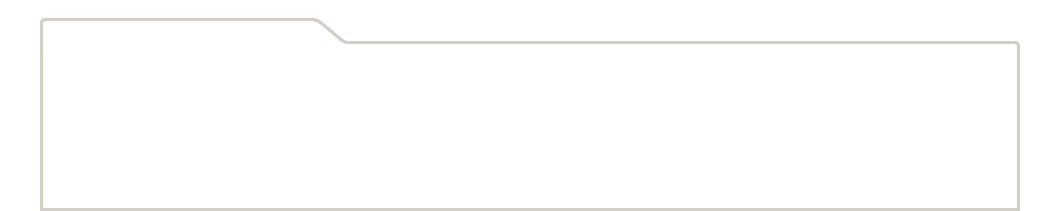
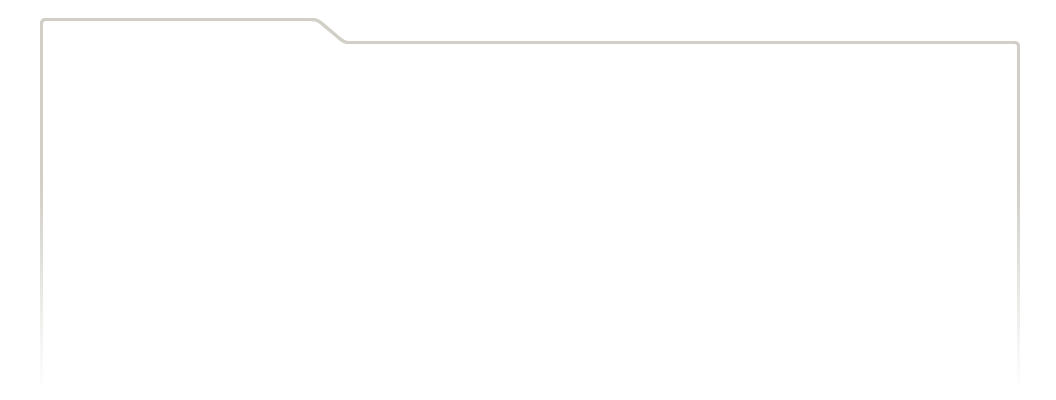
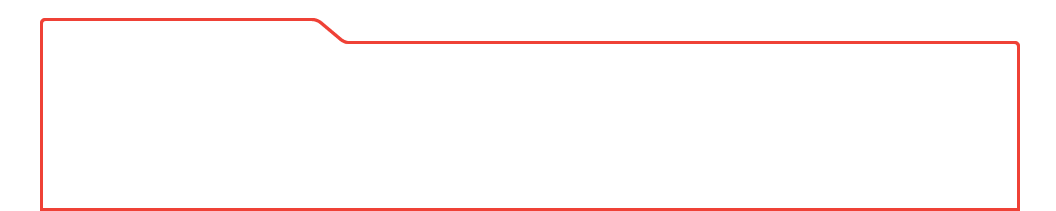
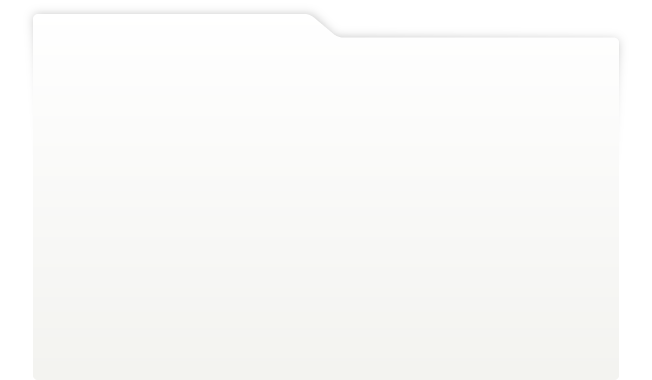
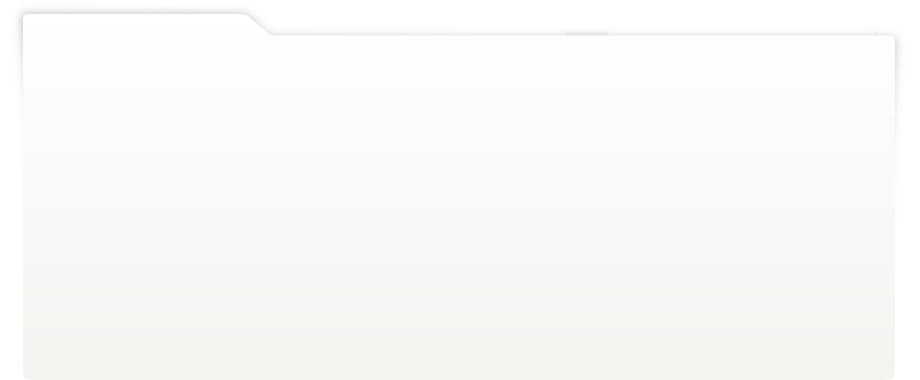
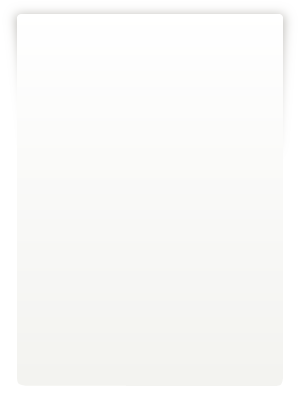
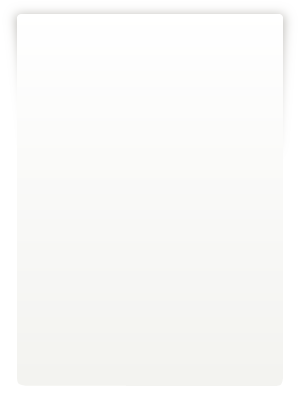
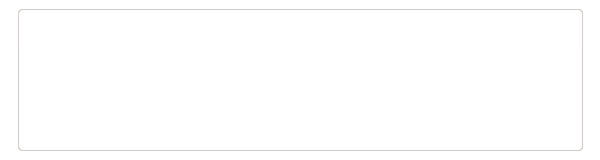
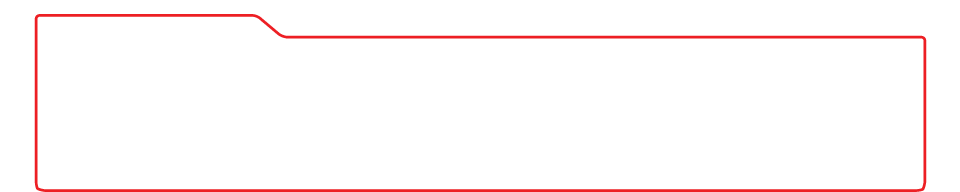
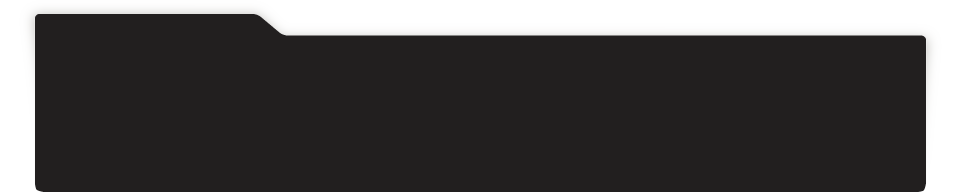
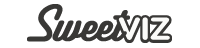
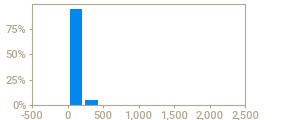
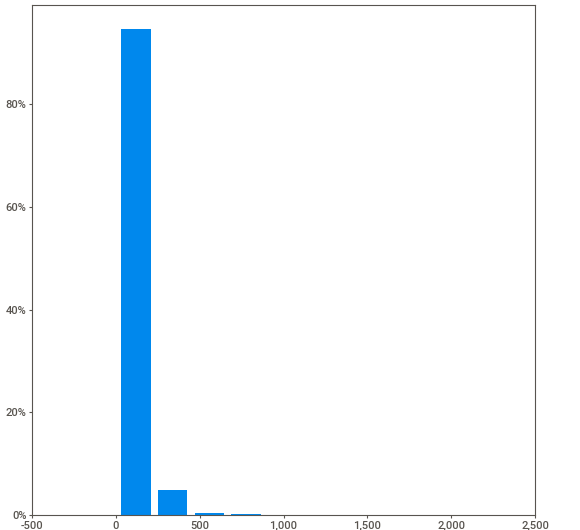
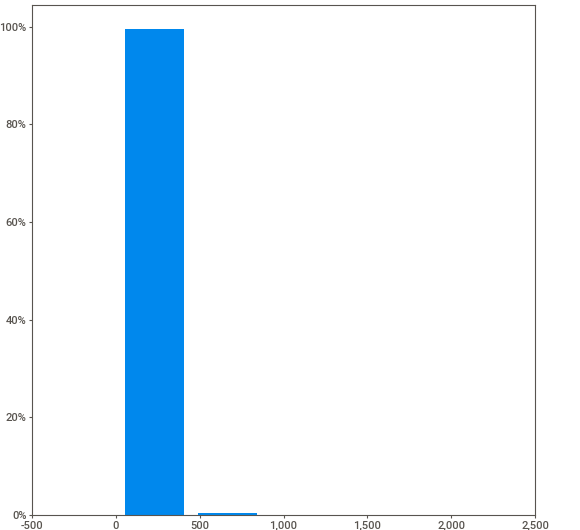
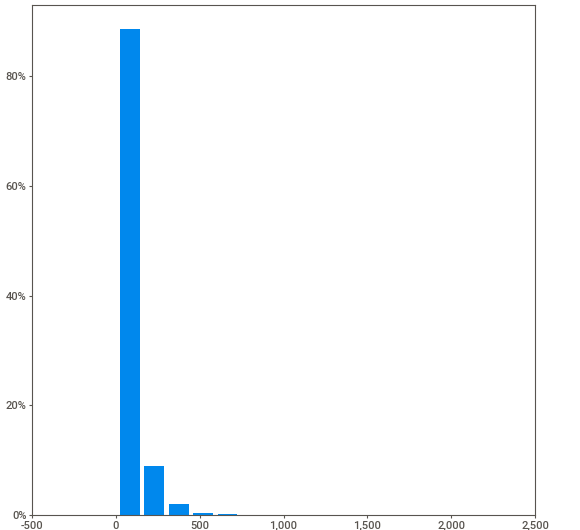
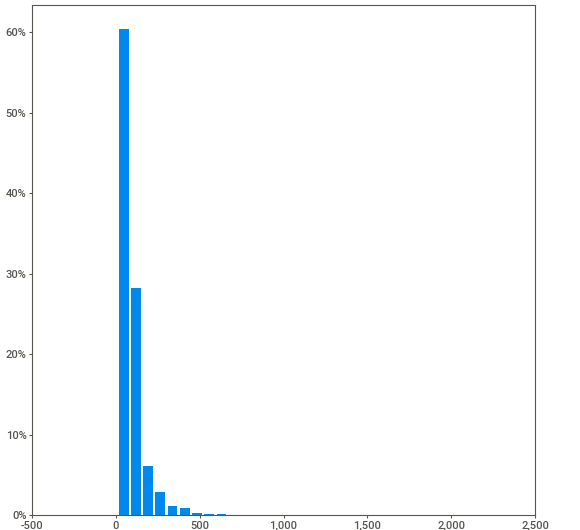
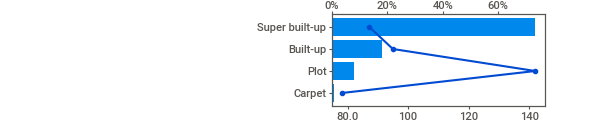
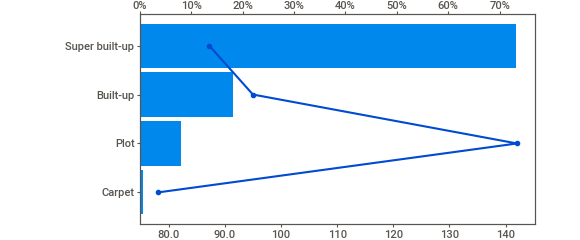
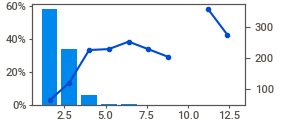
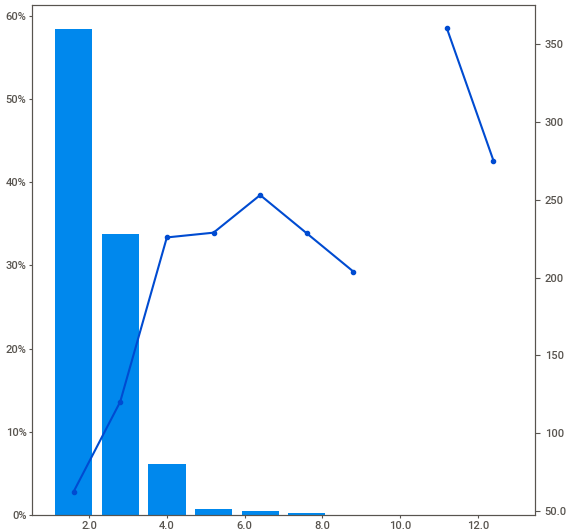
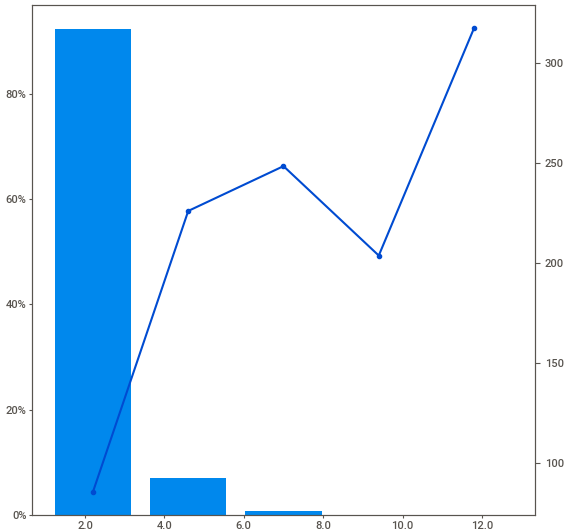
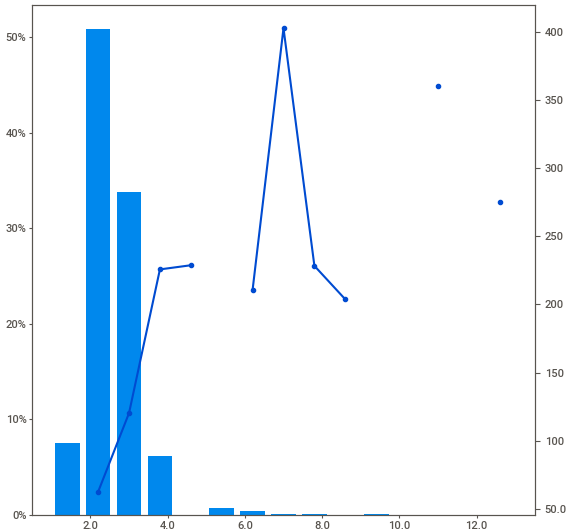
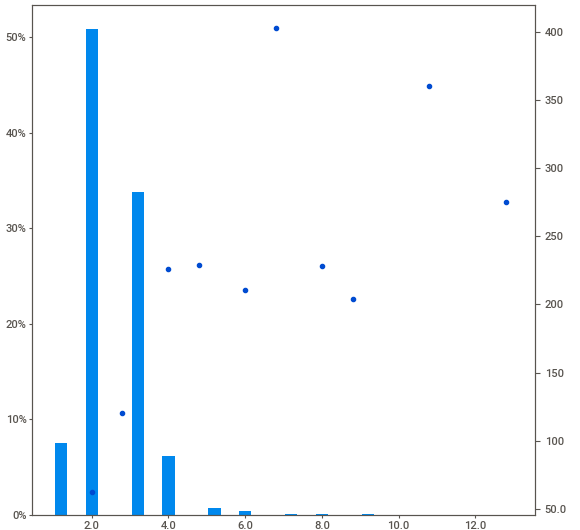
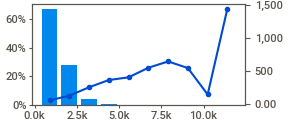
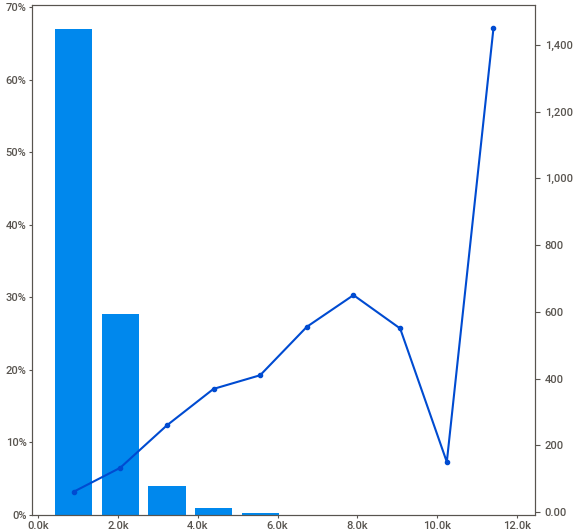
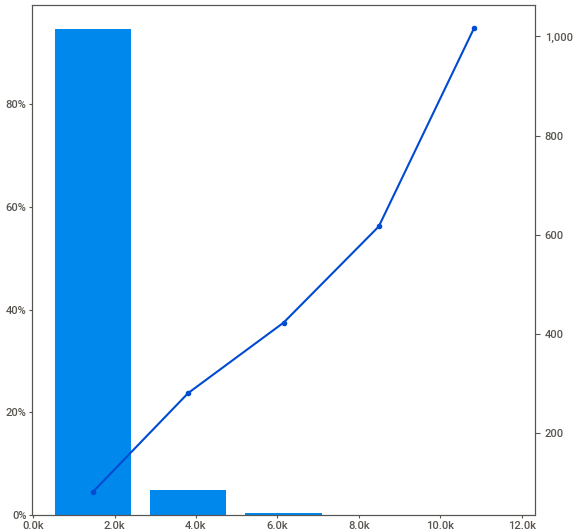
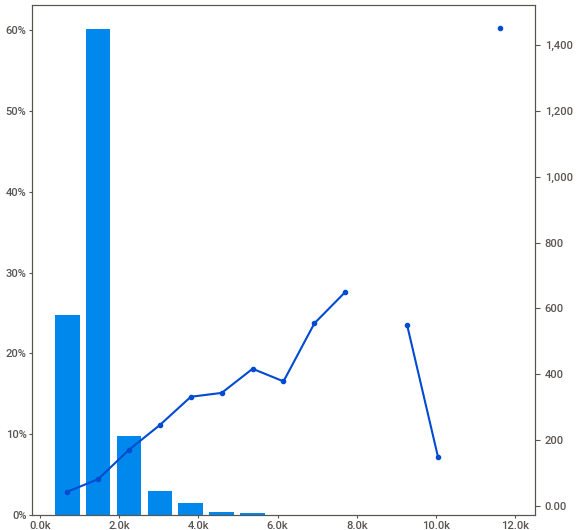
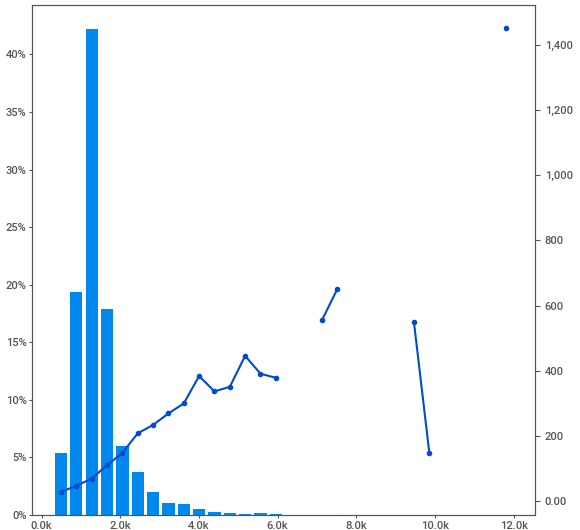
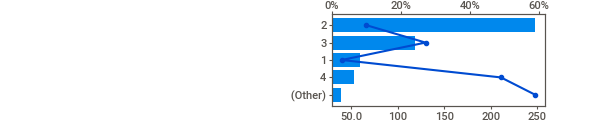
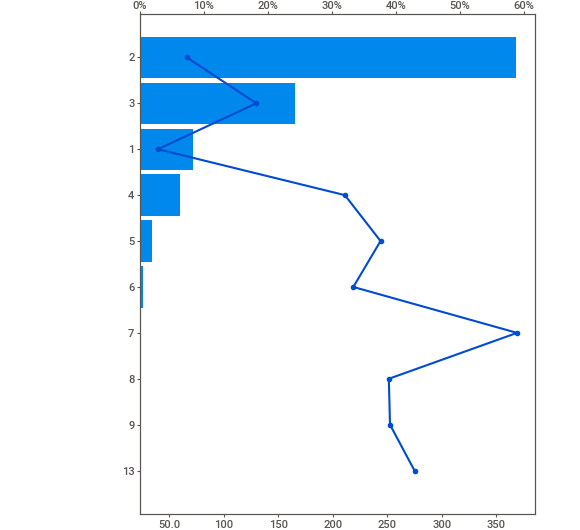
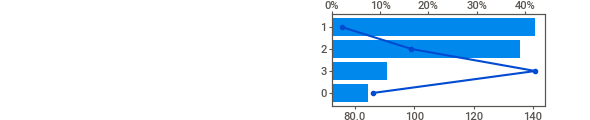
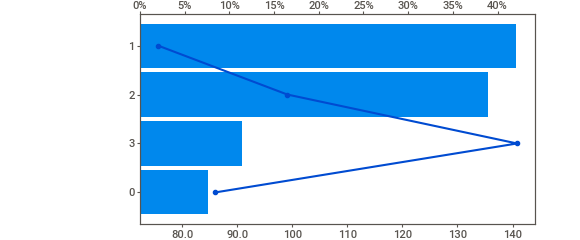
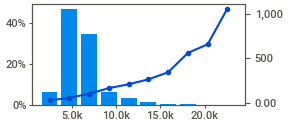
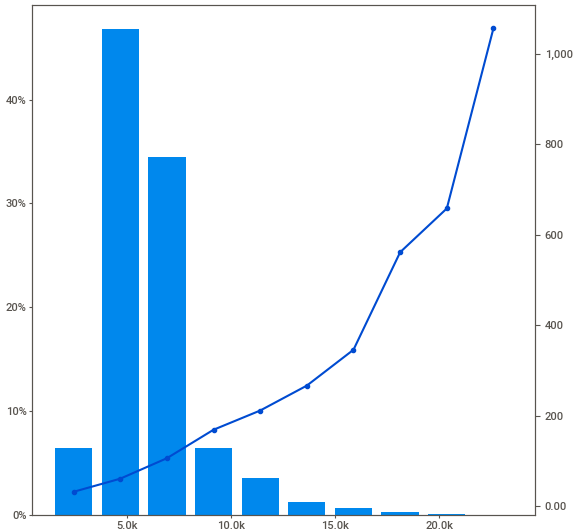
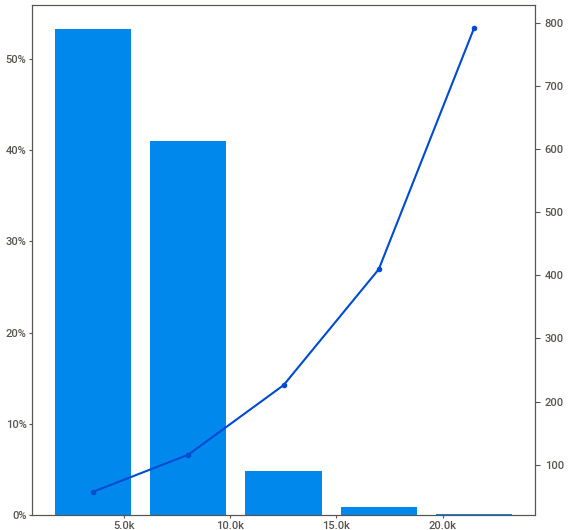
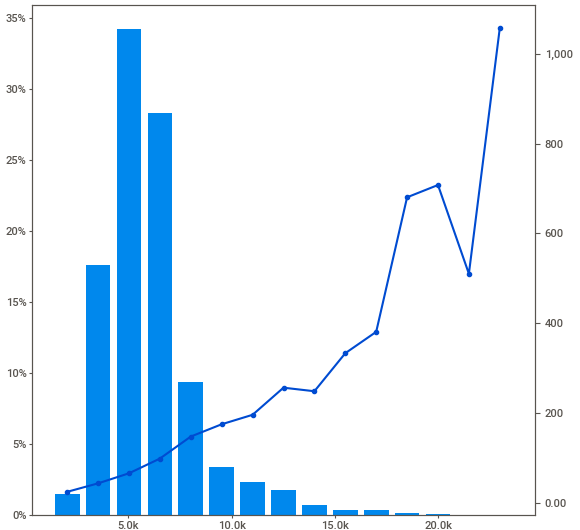
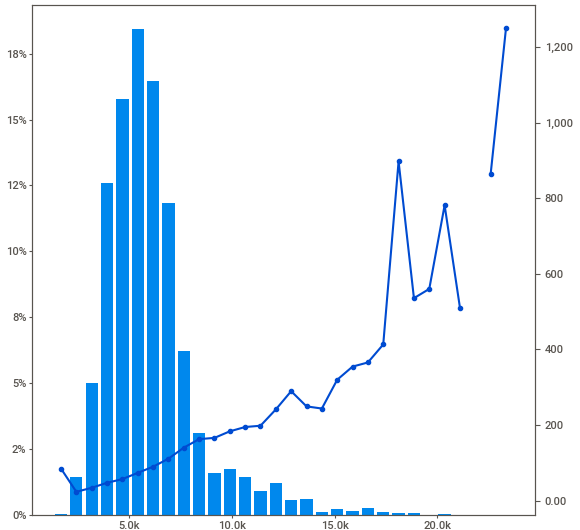
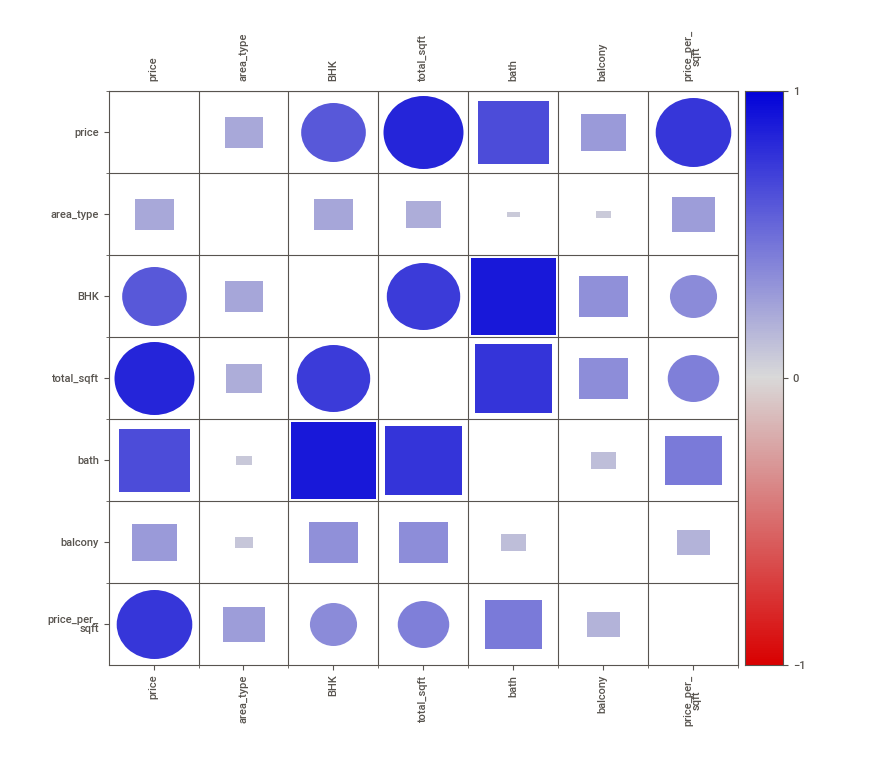
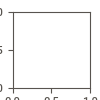

Report 'Sweetviz_Report.html' was saved to storage.


In [ ]:
# generate report
sweet_report = sv.analyze(source=df, target_feat='price')
sweet_report.show_notebook(w="100%", h="Full", layout='vertical', filepath='Sweetviz_Report.html')

# **3. Data Preparation**